# Some important Python libraries

In [26]:
#!pip install numpy pandas scikit-learn matplotlib seaborn scipy

# Numpy + Scipy: Matrices, arrays, numerical analysis
# Pandas: Pandas dataframes are like Excel files!
# Matplotlib, Seaborn: Visualization
# Scikit-learn: Machine learning

# Tabular data


### Loading Diabetes dataset

| Feature           | Meaning                                                                 |
|-------------------|-------------------------------------------------------------------------|
| preg              | Number of pregnancies                                                   |
| plas              | Plasma glucose concentration after 2 hours in an oral glucose tolerance test |
| pres              | Diastolic blood pressure (mm Hg)                                        |
| skin              | Triceps skinfold thickness (mm)                                         |
| insu              | 2-Hour serum insulin (mu U/ml)                                          |
| mass              | Body mass index (BMI) = weight (kg) / height (m)^2                      |
| pedi              | Diabetes pedigree function (risk score based on family history)         |
| age               | Age in years                                                            |
| DiseaseProgression| Target variable — quantitative measure of disease progression           |


In [27]:
from sklearn.datasets import fetch_openml

# Fetch raw diabetes dataset
diabetes_openml = fetch_openml(name="diabetes", version=1, as_frame=True)

# Get features + target
diabetes_data = diabetes_openml.data
diabetes_data['DiseaseProgression'] = diabetes_openml.target

# Map target to binary: 1 = tested_positive, 0 = tested_negative
diabetes_data['DiseaseProgression'] = diabetes_data['DiseaseProgression'].map({
    'tested_negative': -1,
    'tested_positive': 1
})

diabetes_data.head()


,preg,plas,pres,skin,insu,mass,pedi,age,DiseaseProgression
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1


### Overall check of DF columns and variable types and NaN values


In [28]:
diabetes_data.info()  # General information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   preg                768 non-null    int64   
 1   plas                768 non-null    int64   
 2   pres                768 non-null    int64   
 3   skin                768 non-null    int64   
 4   insu                768 non-null    int64   
 5   mass                768 non-null    float64 
 6   pedi                768 non-null    float64 
 7   age                 768 non-null    int64   
 8   DiseaseProgression  768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [29]:
import pandas as pd

# Show 3 decimals instead of scientific notation or too many
pd.set_option("display.precision", 2)
diabetes_data.describe()  # Summary statistics for numerical data

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


### Simple visualization of your DF

#### Scatter plots

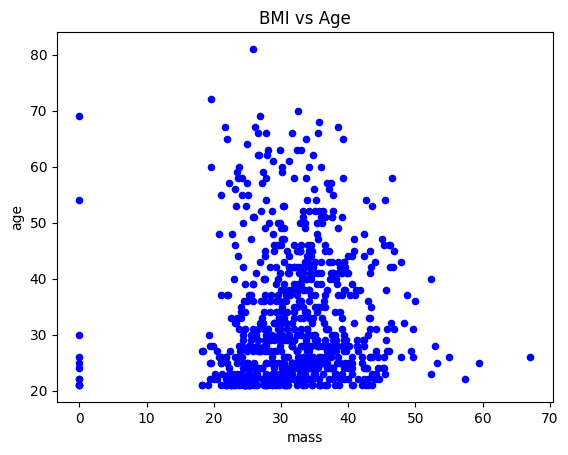

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for BMI vs Disease Progression
diabetes_data.plot(kind='scatter', x='mass', y='age', title='BMI vs Age', color='blue')

# plt.ylabel('Disease Progression')
plt.show()



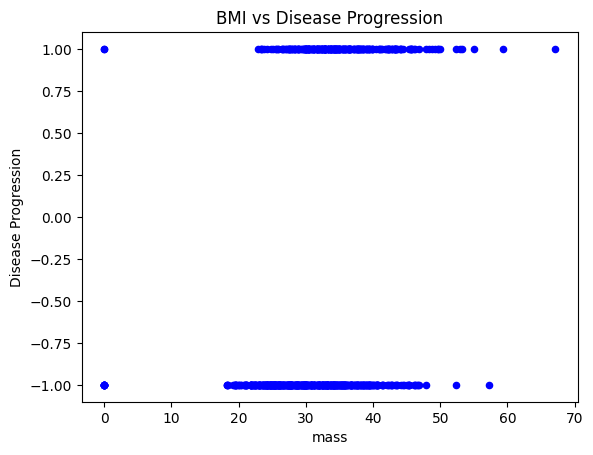

In [31]:
# Scatter plot for BMI vs Disease Progression
diabetes_data.plot(kind='scatter', x='mass', y='DiseaseProgression', title='BMI vs Disease Progression', color='blue')

plt.ylabel('Disease Progression')
plt.show()

#### Histograms

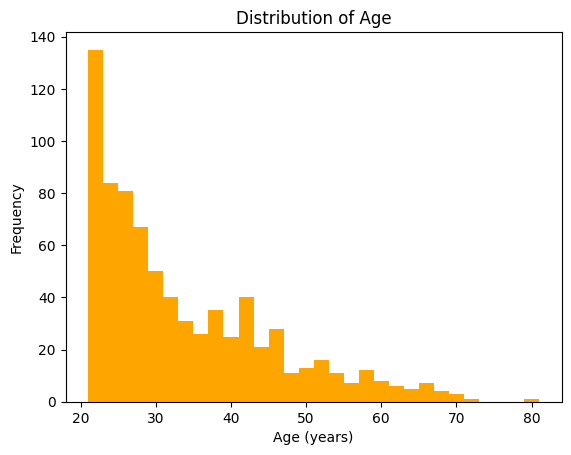

In [32]:
import matplotlib.pyplot as plt

# Histogram of Age
diabetes_data['age'].plot(
    kind='hist',
    bins=30,
    title='Distribution of Age',
    color='orange'
)

plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()


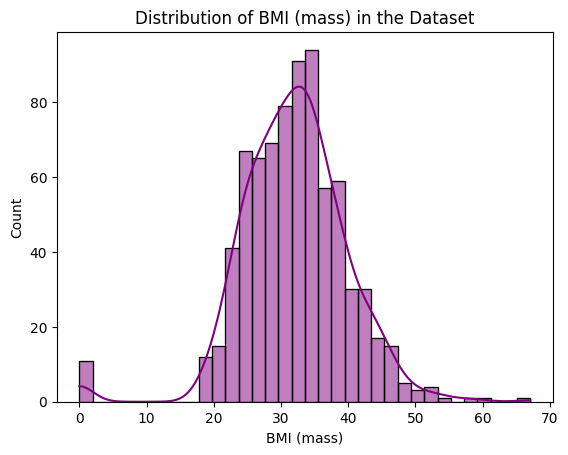

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for BMI (mass)
sns.histplot(diabetes_data['mass'], kde=True, color='purple')

plt.title('Distribution of BMI (mass) in the Dataset')
plt.xlabel('BMI (mass)')
plt.show()


#### Boxplots

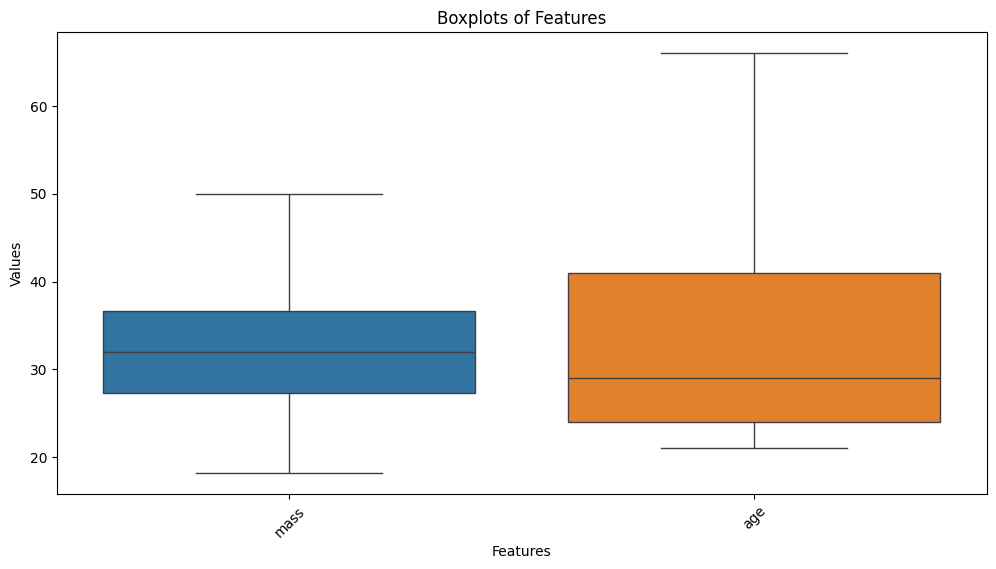

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the feature columns (exclude target)
feature_cols = ['mass', 'age']

plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_data[feature_cols], showfliers=False)

plt.title("Boxplots of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  # rotate labels for readability
plt.show()


#### Pearson correlation

- Measures linear association between two continuous variables.  

**Formula:**

$$
\rho_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \, \sigma_Y}
$$

**Values:**
- **+1** → perfect positive linear correlation  
- **0** → no linear correlation  
- **–1** → perfect negative linear correlation  


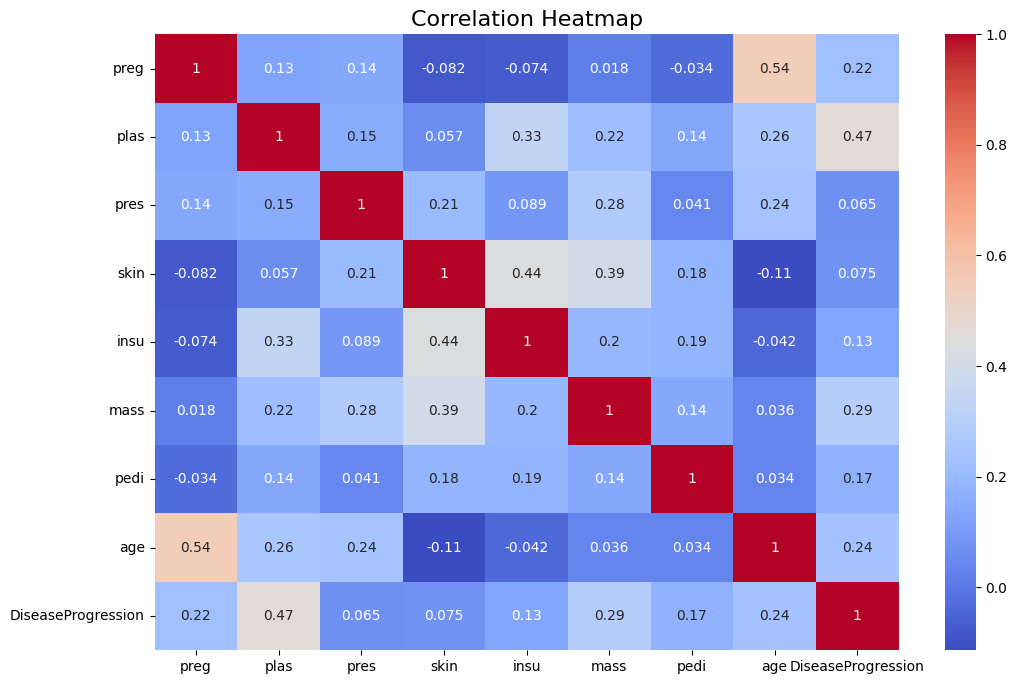

In [35]:
# Calculate the correlation matrix
corr_matrix = diabetes_data.corr()

# Set the figure size (e.g., 12x8 inches)
plt.figure(figsize=(12, 8))

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


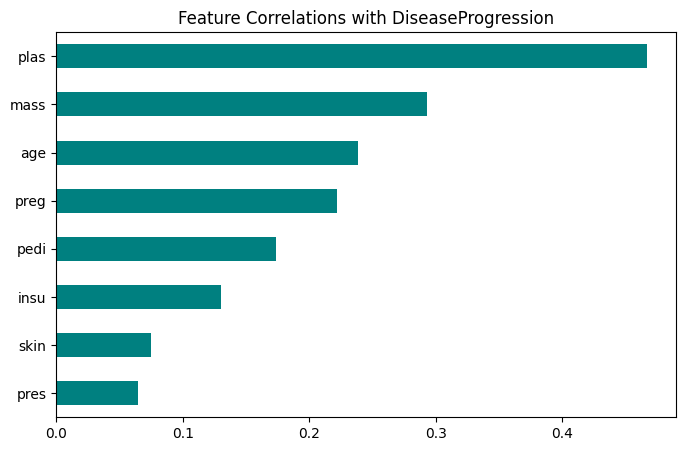

In [36]:
target = 'DiseaseProgression'
correlations = diabetes_data.corr()[target].drop(target).sort_values()

plt.figure(figsize=(8,5))
correlations.plot(kind='barh', color='teal')
plt.title(f'Feature Correlations with {target}')
plt.show()


# Time-series
A sequence of data points (samples) that are ordered by time

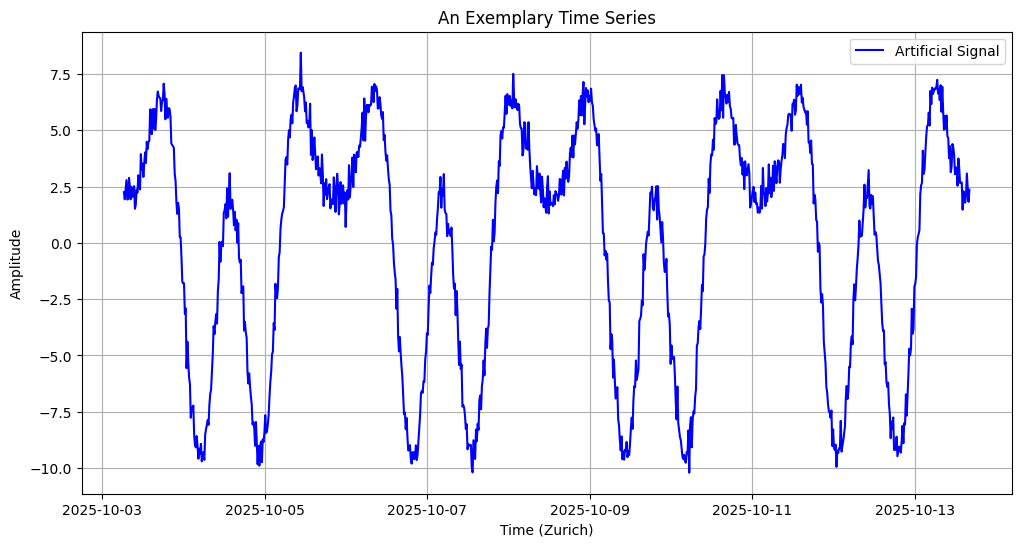

,Time,Value
0,2025-10-03 06:26:00+02:00,2.25
1,2025-10-03 06:41:00+02:00,1.93
2,2025-10-03 06:56:00+02:00,2.33
3,2025-10-03 07:11:00+02:00,2.78
4,2025-10-03 07:26:00+02:00,1.92


In [37]:
# Here is a Python code to generate an artificial time series signal,
# and a time column with the Zurich timezone:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime, timedelta

# Generate an artificial time series signal with peaks and dims
np.random.seed(42)  # For reproducibility
time_points = 1000  # Number of time points
time_series = np.linspace(0, 50, time_points)  # Simulating a time axis

# Creating a synthetic signal with peaks and dips
signal = (
    np.sin(time_series) * np.sin(0.5 * time_series) * 10 +
    np.cos(2 * time_series) * 2 +
    np.random.normal(scale=0.5, size=time_points)
)

# Create a time column in Zurich timezone (CET/CEST)
start_time = datetime(2025, 10, 3, 5, 0, tzinfo=pytz.timezone('Europe/Zurich'))
time_column = [start_time + timedelta(minutes=15 * i) for i in range(time_points)]

# Create a DataFrame with the time and signal
df_time_series = pd.DataFrame({
    'Time': time_column,
    'Value': signal
})

# Plot the artificial signal
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Time'], df_time_series['Value'], label='Artificial Signal', color='blue')
plt.title('An Exemplary Time Series')
plt.xlabel('Time (Zurich)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

df_time_series.head()


UNIX timestamp vs datetime

In [38]:
# Create a new column 'Timestamp' by converting the 'Time' column to UNIX timestamps
df_time_series['Timestamp'] = df_time_series['Time'].apply(lambda x: x.timestamp())

# Display the first few rows of the DataFrame with the new 'Timestamp' column
df_time_series[['Time', 'Timestamp', 'Value']].head()


,Time,Timestamp,Value
0,2025-10-03 06:26:00+02:00,1.76e+09,2.25
1,2025-10-03 06:41:00+02:00,1.76e+09,1.93
2,2025-10-03 06:56:00+02:00,1.76e+09,2.33
3,2025-10-03 07:11:00+02:00,1.76e+09,2.78
4,2025-10-03 07:26:00+02:00,1.76e+09,1.92


Looking at a time-frame of your time-series

In [39]:
# Define the start and end datetimes
start_datetime = datetime(2025, 10, 3, 6, 0, tzinfo=pytz.timezone('Europe/Zurich'))  # Example start datetime
end_datetime = datetime(2025, 10, 3, 7, 0, tzinfo=pytz.timezone('Europe/Zurich'))    # Example end datetime

# Convert the datetimes to UNIX timestamps
start_timestamp = start_datetime.timestamp()
end_timestamp = end_datetime.timestamp()

# Select the chunk of the DataFrame between the two timestamps
signal_chunk = df_time_series[(df_time_series['Timestamp'] >= start_timestamp) &
                              (df_time_series['Timestamp'] <= end_timestamp)]

# Display the filtered DataFrame
signal_chunk[['Time', 'Timestamp', 'Value']]


,Time,Timestamp,Value
4,2025-10-03 07:26:00+02:00,1.76e+09,1.92
5,2025-10-03 07:41:00+02:00,1.76e+09,1.95
6,2025-10-03 07:56:00+02:00,1.76e+09,2.88
7,2025-10-03 08:11:00+02:00,1.76e+09,2.51
8,2025-10-03 08:26:00+02:00,1.76e+09,1.93


# Sampling
The Nyquist–Shannon sampling theorem is a fundamental principle in the field of signal processing and information theory.<br>
It states that for a continuous-time signal to be properly reconstructed from its sampled values, the sampling rate must be bigger than at least twice the highest frequency component present in the signal.

Mathematically, the theorem can be expressed as:

f<sub>s</sub> > 2 * f<sub>max</sub>

Where:

- f<sub>s</sub> is the sampling rate (samples per second)
- f<sub>max</sub> is the maximum frequency present in the signal
- f<sub>s</sub> = 2 * f<sub>max</sub>, is known as the Nyquist rate.

If f<sub>s</sub> > 2 * f<sub>max</sub> is not met, a phenomenon known as aliasing occurs. Aliasing is the effect where high-frequency components in the original signal appear as lower frequencies in the sampled signal, leading to distortion and incorrect reconstruction of the original signal.


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a signal with two different frequencies
fs = 10000  # Original sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1 = 5  # Frequency of the first sine wave
f2 = 50  # Frequency of the second sine wave
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Define sampling rates around the Nyquist rate
nyquist_rate = 2 * f2  # 2 * highest frequency
sampling_rates = [nyquist_rate / 4, nyquist_rate / 2, nyquist_rate , 1.5 * nyquist_rate, 2 * nyquist_rate, 3 * nyquist_rate]

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2, label='Sampled Signal')
points, = ax.plot([], [], 'ro', label='Intersection Points')
ax.plot(t, signal, 'k--', lw=1, label='Original Signal')
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_title('Effect of Different Sampling Rates on Signal')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

# Position legend outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(0.9, 1.15), borderaxespad=0.)

def init():
    line.set_data([], [])
    points.set_data([], [])
    return line, points

def animate(i):
    rate = sampling_rates[i]
    t_sampled = t[::int(fs/rate)]

    signal_sampled = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled)
    line.set_data(t_sampled, signal_sampled)

    # Find intersection points
    if rate <= nyquist_rate:
        t_intersections = np.intersect1d(t, t_sampled)
        signal_intersections = np.sin(2 * np.pi * f1 * t_intersections) + np.sin(2 * np.pi * f2 * t_intersections)
        points.set_data(t_intersections, signal_intersections)
    else:
        points.set_data([], [])

    ax.set_title(f'Highest Freq: 50Hz\nSampling Rate: {rate}Hz')

    return line, points

ani = FuncAnimation(fig, animate, init_func=init, frames=len(sampling_rates), interval=1000, blit=True)

# Clear the current figure before displaying the animation
plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())


**Question: Why are ~40kHz sampling rates quite popular for audio signals?**



-> because we can't hear sounds above 20kHz

### Missing data in time-series and resampling
Why resample your time-series?<br>
This will ensure the samples of the time-series are uniformly distributed through time. This is usually a must for some pre-processing steps such as filtering.

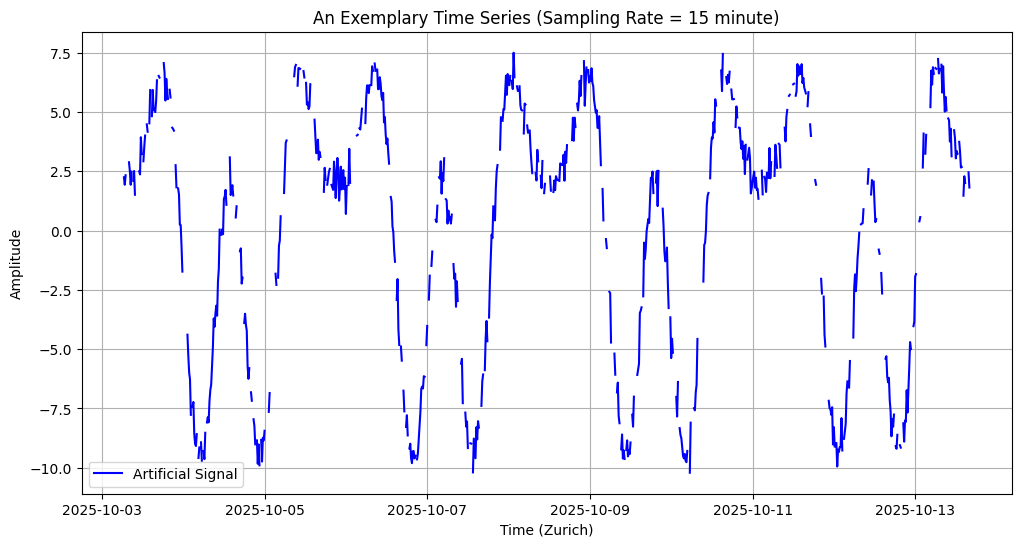

In [41]:
# Here is a Python code to generate an artificial time series signal,
# and a time column with the Zurich timezone:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime, timedelta

# Generate an artificial time series signal with peaks and dims
np.random.seed(42)  # For reproducibility
time_points = 1000  # Number of time points
time_series = np.linspace(0, 50, time_points)  # Simulating a time axis

# Creating a synthetic signal with peaks and dips
signal = (
    np.sin(time_series) * np.sin(0.5 * time_series) * 10 +
    np.cos(2 * time_series) * 2 +
    np.random.normal(scale=0.5, size=time_points)
)

# Create a time column in Zurich timezone (CET/CEST)
start_time = datetime(2025, 10, 3, 5, 0, tzinfo=pytz.timezone('Europe/Zurich'))
time_column = [start_time + timedelta(minutes=15 * i) for i in range(time_points)]

# Create a DataFrame with the time and signal
df_time_series = pd.DataFrame({
    'Time': time_column,
    'Value': signal
})

# Randomly select 15% of the rows to set as NaN
nan_indices = np.random.choice(df_time_series.index, size=int(0.25 * len(df_time_series)), replace=False)
df_time_series.loc[nan_indices, 'Value'] = np.nan

# Create a new column 'Timestamp' by converting the 'Time' column to UNIX timestamps
df_time_series['Timestamp'] = df_time_series['Time'].apply(lambda x: x.timestamp())

# Display the first few rows of the DataFrame with the new 'Timestamp' column
df_time_series[['Time', 'Timestamp', 'Value']].head()

# Plot the artificial signal
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Time'], df_time_series['Value'], label='Artificial Signal', color='blue')
plt.title('An Exemplary Time Series (Sampling Rate = 15 minute)')
plt.xlabel('Time (Zurich)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()



In [42]:
# Define time window
start_chunk = pd.Timestamp("2025-10-05", tz="Europe/Zurich")
end_chunk   = pd.Timestamp("2025-10-11 23:59:59", tz="Europe/Zurich")

# Slice dataframe
df_chunk = df_time_series[(df_time_series['Time'] >= start_chunk) &
                          (df_time_series['Time'] <= end_chunk)]

# Sampling interval in seconds (15 minutes)
sample_interval = 15 * 60

# Time span in seconds (chunk)
time_span = df_chunk['Timestamp'].iloc[-1] - df_chunk['Timestamp'].iloc[0]

# Expected samples in this chunk
expected_samples = int(time_span / sample_interval) + 1

# Actual number of samples
actual_samples = df_chunk['Value'].count()

# Completeness
completeness = actual_samples / expected_samples
print(f"Chunk Completeness (2025-10-05 to 2025-10-11): {completeness:.2%}")


Chunk Completeness (2025-10-05 to 2025-10-11): 75.30%


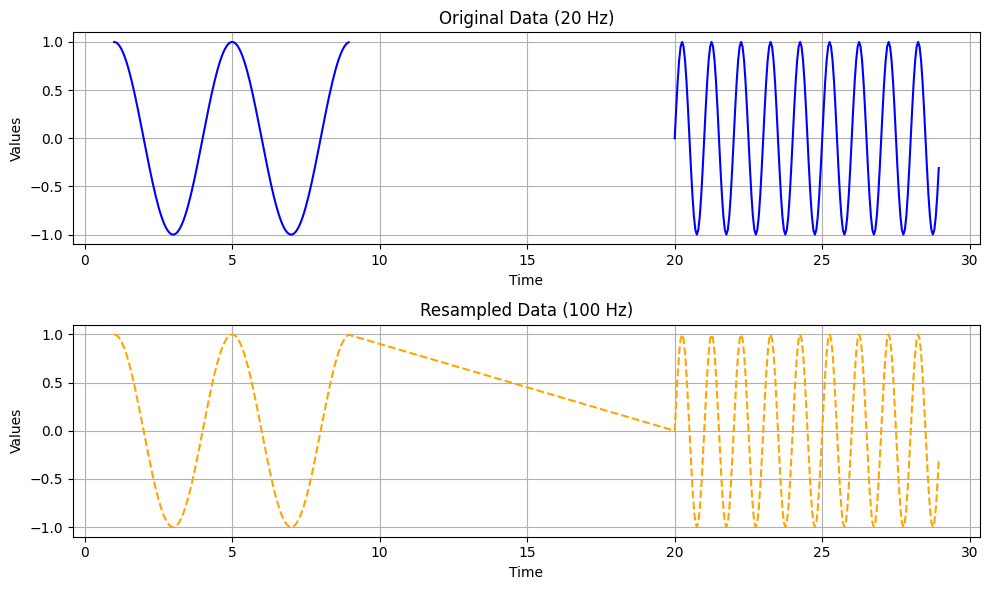

In [43]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Generating example data (time and values)
time_original_1 = np.arange(1, 9, 1/20)  # Original time array (20 Hz)
values_original_1 = np.sin(0.5 * np.pi * time_original_1)  # Example values

time_original_2 = np.arange(20, 29, 1/20)  # Original time array (20 Hz)
values_original_2 = np.sin(2 * np.pi * time_original_2)  # Example values

# Combine the two sets of example data together
# Insert NaN to break the line between chunks
combined_time = np.concatenate((time_original_1, [np.nan], time_original_2))
combined_values = np.concatenate((values_original_1, [np.nan], values_original_2))

# Define new time array with larger time interval (100 Hz)
time_new = np.arange(0, 30, 1/100)  # New time array (100 Hz)

# Use interp1d to interpolate and extrapolate the data
interpolator = interp1d(combined_time, combined_values, kind='slinear', fill_value=(np.nan, np.nan), bounds_error=False)

# Interpolate/extrapolate the values to the new time array
values_new = interpolator(time_new)

# Insert NaN where there are no corresponding data points in the new resampled data
# This ensures gaps between the two chunks in the resampled plot too
values_new[time_new < np.min(time_original_1)] = np.nan
values_new[time_new > np.max(time_original_2)] = np.nan

# Plot the original and resampled data
plt.figure(figsize=(10, 6))

# Plot original signal (with NaN to break the connection between chunks)
plt.subplot(2, 1, 1)
plt.plot(combined_time, combined_values, label='Original Data (20 Hz)', marker='', linestyle='-', color='blue')
plt.title('Original Data (20 Hz)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)

# Plot resampled signal (with NaN handling for gaps)
plt.subplot(2, 1, 2)
plt.plot(time_new, values_new, label='Resampled Data (100 Hz)', marker='', linestyle='--', color='orange')
plt.title('Resampled Data (100 Hz)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)

plt.tight_layout()
plt.show()


### Filtering

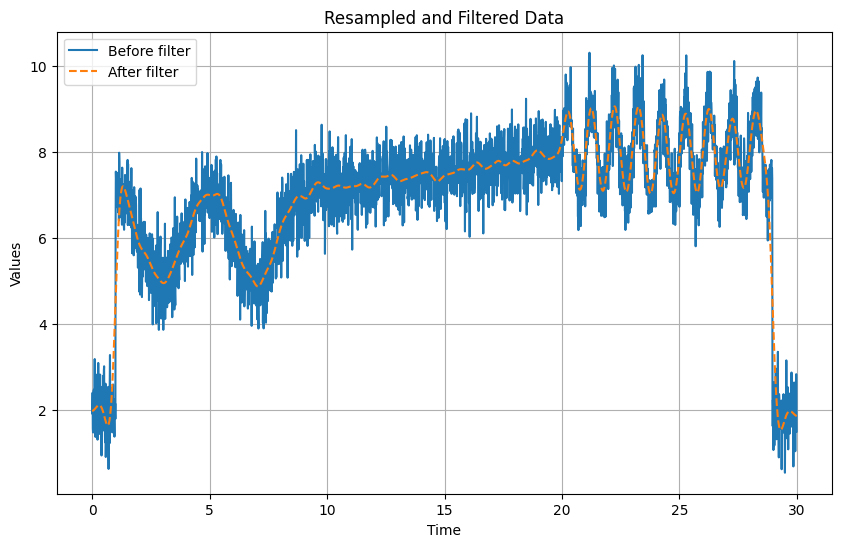

In [44]:
'''Trying different low pass filters'''

import numpy as np
from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Generating example data (time and values)
time_original_1 = np.arange(1, 9, 1/20)  # Original time array (20 Hz)
values_original_1 = np.sin(0.5 * np.pi * time_original_1) + 4  # Example values

time_original_2 = np.arange(20, 29, 1/20)  # Original time array (20 Hz)
values_original_2 = np.sin(2 * np.pi * time_original_2) + 6 # Example values

# Combine the two sets of example data together
combined_time = np.concatenate((time_original_1, time_original_2))
combined_values = np.concatenate((values_original_1, values_original_2))

# Define new time array with larger time interval (100 Hz)
time_resampled = np.arange(0, 30, 1/100)  # New time array (100 Hz)

# Use interp1d to interpolate and extrapolate the data
interpolator = interp1d(combined_time, combined_values, kind='slinear', fill_value=(0, 0), bounds_error=False)

# Interpolate/extrapolate the values to the new time array
values_resampled = interpolator(time_resampled) + 2 + np.random.normal(0, 0.5, len(time_resampled))


def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

values_filtered = butter_lowpass_filter(values_resampled, 1.5, 100, 3)


# Plot the original and resampled data
plt.figure(figsize=(10, 6))
plt.plot(time_resampled, values_resampled, label='Before filter', marker='', linestyle='-')
plt.plot(time_resampled, values_filtered, label='After filter', marker='', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Resampled and Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


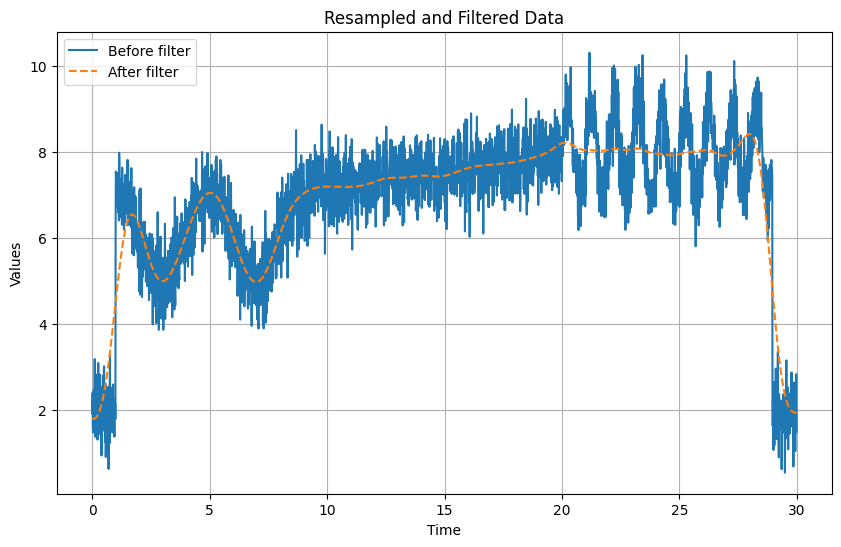

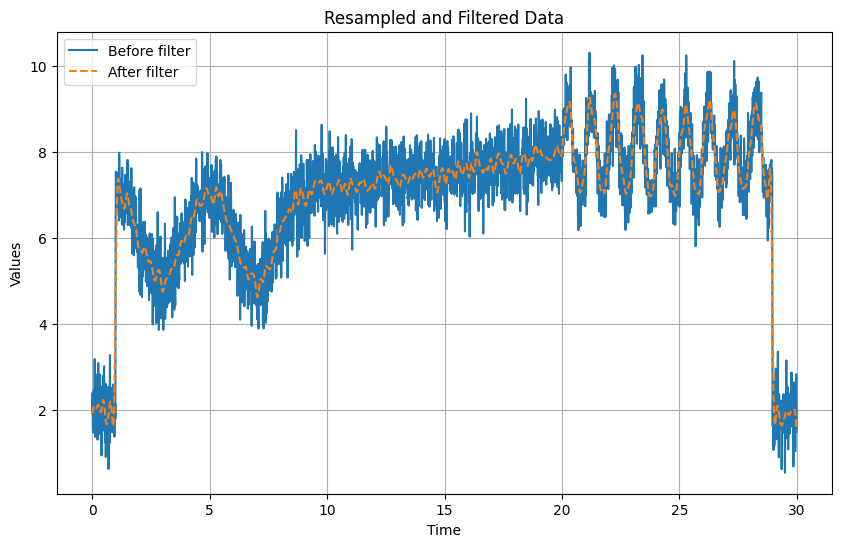

In [45]:
# exercice 1
# play with the parameters of the low-pass filter
values_filtered_2 = butter_lowpass_filter(values_resampled, 0.5, 100, 3)

# Plot the original and resampled data
plt.figure(figsize=(10, 6))
plt.plot(time_resampled, values_resampled, label='Before filter', marker='', linestyle='-')
plt.plot(time_resampled, values_filtered_2, label='After filter', marker='', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Resampled and Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


values_filtered_3 = butter_lowpass_filter(values_resampled, 4.5, 100, 3)

# Plot the original and resampled data
plt.figure(figsize=(10, 6))
plt.plot(time_resampled, values_resampled, label='Before filter', marker='', linestyle='-')
plt.plot(time_resampled, values_filtered_3, label='After filter', marker='', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Resampled and Filtered Data')
plt.legend()
plt.grid(True)
plt.show()

### Spectral Analysis and Visualization

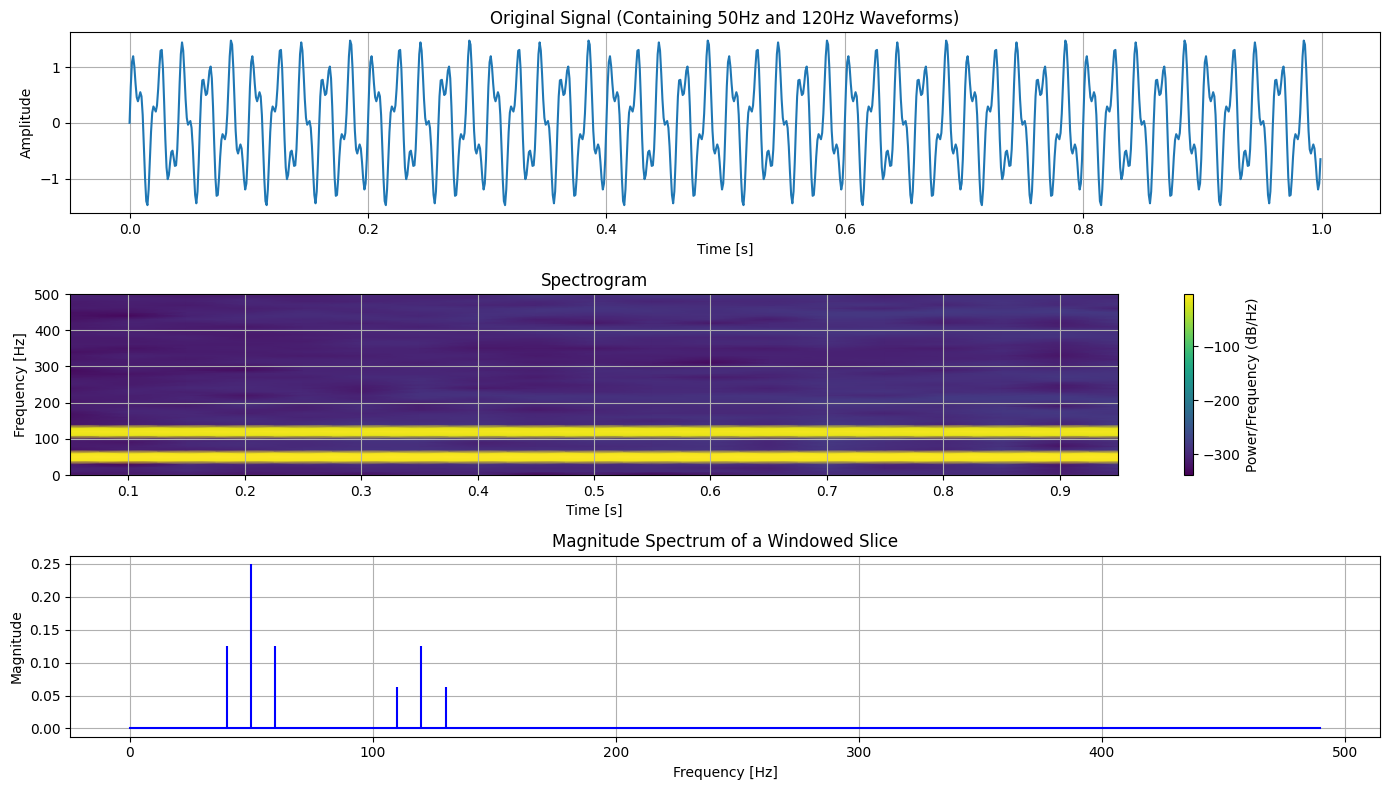

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows, spectrogram

# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration in seconds
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Time vector

# Create a signal with two different frequencies
f1 = 50   # Frequency of the first sine wave (Hz)
f2 = 120  # Frequency of the second sine wave (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parameters for windowing
window_length = 100  # Length of the window
window_type = 'hann'  # Type of the window (e.g., 'hann', 'hamming', etc.)
window = windows.get_window(window_type, window_length)
n_overlap = window_length // 2  # Number of overlapping samples

# Perform STFT
frequencies, times, Sxx = spectrogram(signal, fs, window=window, nperseg=window_length, noverlap=n_overlap, scaling='spectrum')

# Plot the original signal
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal (Containing 50Hz and 120Hz Waveforms)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the spectrogram
plt.subplot(3, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.grid(True)

# Illustration of windowing effect
# Select a specific time slice for illustration
time_slice = int(0.5 * fs) + 110  # Center of the signal (at 0.5 seconds)
signal_slice = signal[time_slice:time_slice + window_length] * window

# Perform FFT on the windowed signal slice
N_slice = len(signal_slice)
fft_result_slice = np.fft.fft(signal_slice)
fft_freq_slice = np.fft.fftfreq(N_slice, 1/fs)

# Only take the positive frequencies and corresponding FFT results
positive_freqs_slice = fft_freq_slice[:N_slice//2]
positive_fft_result_slice = fft_result_slice[:N_slice//2]

# Magnitude of the FFT (normalized)
magnitude_slice = np.abs(positive_fft_result_slice) / N_slice

# Plot the FFT (magnitude spectrum) of the windowed signal slice
plt.subplot(3, 1, 3)
plt.stem(positive_freqs_slice, magnitude_slice, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum of a Windowed Slice')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


# Loading tutorial dataset

In [47]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Example of reading a CSV file with pandas
import pandas as pd

file_path = '/content/drive/MyDrive/AI in Rehab/Tutorial-MotionSense/data_subjects_info.csv'
df = pd.read_csv(file_path)

print(df.head())

   code  weight  height  age  gender
0     1     102     188   46       1
1     2      72     180   28       1
2     3      48     161   28       0
3     4      90     176   31       1
4     5      48     164   23       0


In [49]:
import pandas as pd

data_path = '/content/drive/MyDrive/AI in Rehab/Tutorial-MotionSense/'

n_subjects = 5

trials = {
    'downstairs': {'dws_1', 'dws_2', 'dws_11'},
    'upstairs': {'ups_3', 'ups_4', 'ups_12'},
    'walking': {'wlk_7', 'wlk_8', 'wlk_15'},
    'sitting': {'sit_5', 'sit_13'},
    'standing': {'std_6', 'std_14'},
    'jogging': {'jog_9', 'jog_16'}
}

import pandas as pd
import numpy as np

def load_with_timestamp(path, sample_rate=50):
    df = pd.read_csv(path)

    # remove the unnamed first col (sample index from file)
    df = df.drop(df.columns[0], axis=1)

    # compute timestamps (ns precision to avoid float issues)
    n_samples = len(df)
    timestamps = np.arange(n_samples) * (1e9 / sample_rate)  # in nanoseconds
    # make into datetime64[ns] starting at unix epoch (0)
    df.insert(0, "datetime", pd.to_datetime(timestamps, unit="ns"))

    timestamps = np.arange(n_samples) / sample_rate  # [0, 0.02, 0.04, ...]
    df.insert(1, "timestamp", timestamps)

    return df


data = {}

for i_subject in range(1, n_subjects):
  subject = f'sub_{i_subject}'
  data[subject] = {}
  for activity in trials.keys():
    data[subject][activity] = {}
    for trial in trials[activity]:
      df_acc_path = data_path + f'Accelerometer_data/{trial}/{subject}.csv'
      df_acc = load_with_timestamp(df_acc_path)
      df_gyro_path = data_path + f'Gyroscope_data/{trial}/{subject}.csv'
      df_gyro = load_with_timestamp(df_gyro_path)

      data[subject][activity][trial] = {
          "acc": df_acc,
          "gyro": df_gyro
      }

In [50]:
data['sub_1']['downstairs']['dws_11'].keys()

dict_keys(['acc', 'gyro'])

In [51]:
data['sub_3']['downstairs']['dws_1']['gyro']

,datetime,timestamp,x,y,z
0,1970-01-01 00:00:00.000,0.00,1.22,0.31,0.34
1,1970-01-01 00:00:00.020,0.02,0.56,0.15,0.42
2,1970-01-01 00:00:00.040,0.04,-0.28,-0.32,0.30
3,1970-01-01 00:00:00.060,0.06,-0.77,-0.66,0.05
4,1970-01-01 00:00:00.080,0.08,-0.94,-0.39,-0.10
...,...,...,...,...,...
2266,1970-01-01 00:00:45.320,45.32,-1.06,0.20,-0.17
2267,1970-01-01 00:00:45.340,45.34,-0.85,0.14,-0.31
2268,1970-01-01 00:00:45.360,45.36,-0.53,0.22,-0.43
2269,1970-01-01 00:00:45.380,45.38,-0.10,0.36,-0.46


# A small exercise!

* Do the completeness analysis per trial and subject for the loaded dataset (nominal sampling rate of 50Hz).
* Apply a propper low-pass filter to your data (human motion does not exceed 10Hz). Remember that if your data is irregularly sampled, you need to upsample first.
* After applying the filter, downsample to a propper sample rate.

In [52]:
## completeness analysis
sample_rate = 50  # Hz

for subject, activities in data.items():
    print(f"\nSubject: {subject}")

    for activity, trials in activities.items():
        for trial, sensors in trials.items():
            completeness_list = []

            for sensor_name, df in sensors.items():
                if not df.empty:
                    duration = df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]
                    expected = int(duration * sample_rate) + 1
                    actual = df.dropna().shape[0]
                    completeness = actual / expected
                    completeness_list.append(completeness)

            if completeness_list:
                avg_completeness = sum(completeness_list) / len(completeness_list)
            else:
                avg_completeness = 0

            print(f"  {activity} - {trial}: completeness = {avg_completeness:.2%}")



Subject: sub_1
  downstairs - dws_1: completeness = 100.00%
  downstairs - dws_2: completeness = 100.00%
  downstairs - dws_11: completeness = 100.00%
  upstairs - ups_12: completeness = 100.00%
  upstairs - ups_3: completeness = 100.00%
  upstairs - ups_4: completeness = 100.00%
  walking - wlk_8: completeness = 100.00%
  walking - wlk_15: completeness = 100.00%
  walking - wlk_7: completeness = 100.00%
  sitting - sit_13: completeness = 100.00%
  sitting - sit_5: completeness = 100.00%
  standing - std_6: completeness = 100.00%
  standing - std_14: completeness = 100.00%
  jogging - jog_16: completeness = 100.00%
  jogging - jog_9: completeness = 100.00%

Subject: sub_2
  downstairs - dws_1: completeness = 100.00%
  downstairs - dws_2: completeness = 100.00%
  downstairs - dws_11: completeness = 100.00%
  upstairs - ups_12: completeness = 100.00%
  upstairs - ups_3: completeness = 100.00%
  upstairs - ups_4: completeness = 100.00%
  walking - wlk_8: completeness = 100.00%
  walking 

In [53]:
## low-pass filter
cutoff = 10      # human motion limit (Hz)
fs = 50          # nominal sampling rate (Hz)
target_fs = 20   # target sampling rate (Hz)
order = 3

for subject, activities in data.items():
    for activity, trials in activities.items():
        for trial, sensors in trials.items():
            for sensor_name, df in sensors.items():
                if df is None or df.empty:
                    continue

                # Apply filter directly
                for axis in ['x', 'y', 'z']:
                    df.loc[:, axis] = butter_lowpass_filter(df[axis], cutoff, fs, order)

                # Downsample to 20Hz
                downsample_factor = int(fs / target_fs)  # 50/20 = 2.5 → about every 3rd sample
                df_down = df.iloc[::downsample_factor, :].reset_index(drop=True)

                # ✅ Explicitly replace the original dataframe in your nested dict
                sensors[sensor_name] = df_down
